# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import sys
import numpy as np

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat17 = pd.read_csv('../data/sat_2017.csv')
act17 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat17.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act17.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [5]:
act17.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

In [6]:
sat17.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [7]:
act17.describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


In [8]:
sat17.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: There may be bad data on the State cols. SAT Math may have corrupted data.

#### 4a. Does the data look complete? 

Answer: The data looks complete however there maybe some corrupted data

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: The minimum SAT would be 400 and 200 on each section. ACT minimum score would be 1.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [9]:
#code The state col

#### 5. What are your data types? 
Display the data types of each feature. 

In [10]:
#code
sat17.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [11]:
act17.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [12]:
#code
def convert(col):
    for row in col:
        new_col = col[:-1]
        return float(new_col)
    


In [13]:
sat17['Participation'] = sat17['Participation'].apply(convert)

In [14]:
sat17['Participation'].head()

0     5.0
1    38.0
2    30.0
3     3.0
4    53.0
Name: Participation, dtype: float64

In [15]:
act17['Participation'].head()

0     60%
1    100%
2     65%
3     62%
4    100%
Name: Participation, dtype: object

In [16]:
act17['Participation'] = act17['Participation'].apply(convert)

In [17]:
act17['Participation'].head()

0     60.0
1    100.0
2     65.0
3     62.0
4    100.0
Name: Participation, dtype: float64

- Fix any individual values preventing other columns from being the appropriate type.

In [18]:
act17['Composite'] = act17['Composite'].apply(convert)

In [19]:
sat17.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


- Finish your data modifications by making sure the columns are now typed appropriately.

In [20]:
#code
act17.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

- Display the data types again to confirm they are correct.

In [21]:
#Code:
sat17.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [22]:
#code
sat17.columns
sat17_mapper = {
    'State': 'State',
    'Participation': 'sat_participation_2017',
    'Evidence-Based Reading and Writing': 'sat_rw_2017',
    'Math': 'sat_math_2017',
    'Total': 'sat_total_2017'}



In [23]:
sat17.rename(columns = sat17_mapper, inplace = True)

In [24]:
sat17.columns

Index(['State', 'sat_participation_2017', 'sat_rw_2017', 'sat_math_2017',
       'sat_total_2017'],
      dtype='object')

In [25]:
sat17.head()

,State,sat_participation_2017,sat_rw_2017,sat_math_2017,sat_total_2017
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [26]:
act17.columns

Index(['State', 'Participation', 'English', 'Math', 'Reading', 'Science',
       'Composite'],
      dtype='object')

In [27]:
act17.columns
act17_mapper = {
    'State': 'State',
    'Participation': 'act_participation_2017',
    'Evidence-Based Reading and Writing': 'act_rw_2017',
    'Math': 'act_math_2017',
    'Reading': 'act_reading_2017',
    'Science': 'act_sci_2017',
    'English': 'act_eng_2017',
    'Composite': 'Composite_2017'}

In [28]:
act17.rename(columns = act17_mapper, inplace = True)

In [29]:
act17.head()

,State,act_participation_2017,act_eng_2017,act_math_2017,act_reading_2017,act_sci_2017,Composite_2017
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.0
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.0
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.0
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.0


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|State|object|ACT/SAT|Every State including D.C.|
|act_participation_18|float|ACT|Percentage of students who took the ACT in 2018| 
|Composite_18|float|ACT|Composite score for the ACT in 2018| 
|sat_participation_18|float|SAT|Percentage of students of took the SAT in 2018| 
|sat_rw_18|int|SAT|SAT Reading and Writing score for 2018| 
|sat_math_18|int|SAT|SAT Math score for 2018| 
|sat_total_18|int|SAT|SAT total score for 2018| 
|act_participation_2017|float|ACT|% of students of took the ACT in 2017| 
|act_eng_2017|float|ACT|ACT English score in 2017|
|act_math_2017|float|ACT|ACT Math score in 2017| 
|act_reading_2017|float|ACT|ACT Reading score in 2017|
|act_sci_2017|float|ACT|ACT Science score in 2017| 
|Composite_2017|float|ACT|ACT Composite or Total score in 2017|
|sat_participation_2017|float|SAT|Percentage of students who took the SAT in 2017| 
|sat_rw_2017|int|SAT|SAT Reading and Writing in 2017|
|sat_math_2017|int|SAT|SAT Math score for 2017| 
|sat_total_2017|int|SAT|Total SAT score for 2017|


In [183]:
final.dtypes

State                      object
act_participation_18      float64
Composite_18              float64
sat_participation_18      float64
sat_rw_18                   int64
sat_math_18                 int64
sat_total_18                int64
act_participation_2017    float64
act_eng_2017              float64
act_math_2017             float64
act_reading_2017          float64
act_sci_2017              float64
Composite_2017            float64
sat_participation_2017    float64
sat_rw_2017                 int64
sat_math_2017               int64
sat_total_2017              int64
dtype: object

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [30]:
#code
act17['State'].value_counts()

Alabama                 1
Oklahoma                1
Mississippi             1
Hawaii                  1
Utah                    1
Kentucky                1
Connecticut             1
Texas                   1
Kansas                  1
Tennessee               1
New Jersey              1
Missouri                1
New Hampshire           1
Oregon                  1
North Dakota            1
Rhode Island            1
Wisconsin               1
Nevada                  1
Wyoming                 1
Vermont                 1
Maine                   1
National                1
West Virginia           1
Massachusetts           1
Arizona                 1
Florida                 1
Ohio                    1
Illinois                1
South Carolina          1
Georgia                 1
Michigan                1
Arkansas                1
Alaska                  1
Pennsylvania            1
New Mexico              1
Iowa                    1
District of Columbia    1
Maryland                1
Indiana     

In [31]:
act17.shape

(52, 7)

In [32]:
act17['State'].head()

0    National
1     Alabama
2      Alaska
3     Arizona
4    Arkansas
Name: State, dtype: object

In [33]:
act17.drop(index=0,inplace=True)

In [34]:
act17.head()

,State,act_participation_2017,act_eng_2017,act_math_2017,act_reading_2017,act_sci_2017,Composite_2017
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.0
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.0
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.0
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.0
5,California,31.0,22.5,22.7,23.1,22.2,22.0


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [35]:
#Code:
combined_2017 = pd.merge(sat17, act17, on = 'State')
combined_2017.head()

,State,sat_participation_2017,sat_rw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_eng_2017,act_math_2017,act_reading_2017,act_sci_2017,Composite_2017
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.0
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.0
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.0
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.0
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.0


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [36]:
#code
combined_2017.to_csv(index=False)

'State,sat_participation_2017,sat_rw_2017,sat_math_2017,sat_total_2017,act_participation_2017,act_eng_2017,act_math_2017,act_reading_2017,act_sci_2017,Composite_2017\nAlabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.0\nAlaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.0\nArizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.0\nArkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.0\nCalifornia,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.0\nColorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,20.0\nConnecticut,100.0,530,512,1041,31.0,25.5,24.6,25.6,24.6,25.0\nDelaware,100.0,503,492,996,18.0,24.1,23.4,24.8,23.6,24.0\nDistrict of Columbia,100.0,482,468,950,32.0,24.4,23.5,24.9,23.5,24.0\nFlorida,83.0,520,497,1017,73.0,19.0,19.4,21.0,19.4,19.0\nGeorgia,61.0,535,515,1050,55.0,21.0,20.9,22.0,21.3,21.0\nHawaii,55.0,544,541,1085,90.0,17.8,19.2,19.2,19.3,19.0\nIdaho,93.0,513,493,1005,38.0,21.9,21.8,23.0,22.1,22.0\nIllinois,9.0,559,556,1115,93.0,21.0,21.2,21.6,21.3,21.0\nIndiana,63.0,5

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [37]:
sat18 = pd.read_csv('../data/2018_Data - SAT 2018.csv')
act18 = pd.read_csv('../data/2018_Data - ACT 2018.csv')

In [38]:
sat18.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [39]:
act18.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [40]:
sat18.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [41]:
act18.dtypes

State             object
Participation     object
Composite        float64
dtype: object

In [42]:
sat18['Participation'] = sat18['Participation'].apply(convert)

In [43]:
act18['Participation'] = act18['Participation'].apply(convert)

In [44]:
sat18.describe()

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,45.745098,563.686275,556.235294,1120.019608
std,37.314256,47.502627,47.772623,94.155083
min,2.000000,480.000000,480.000000,977.000000
25%,4.500000,534.500000,522.500000,1057.500000
50%,52.000000,552.000000,544.000000,1098.000000
75%,77.500000,610.500000,593.500000,1204.000000
max,100.000000,643.000000,655.000000,1298.000000


In [45]:
act18.describe()

,Participation,Composite
count,52.000000,52.000000
mean,60.673077,21.544231
std,34.545634,2.119417
min,7.000000,17.700000
25%,27.000000,19.975000
50%,65.500000,21.300000
75%,100.000000,23.725000
max,100.000000,25.600000


In [46]:
sat18.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [47]:
act18.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

In [48]:
sat18.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [49]:
act18.head()

,State,Participation,Composite
0,Alabama,100.0,19.1
1,Alaska,33.0,20.8
2,Arizona,66.0,19.2
3,Arkansas,100.0,19.4
4,California,27.0,22.7


In [50]:
act18.drop_duplicates(keep='first',inplace=True)

In [51]:
act18.head()

,State,Participation,Composite
0,Alabama,100.0,19.1
1,Alaska,33.0,20.8
2,Arizona,66.0,19.2
3,Arkansas,100.0,19.4
4,California,27.0,22.7


In [52]:
act18.shape

(51, 3)

In [53]:
act18['State'].value_counts()

Alabama                 1
Oregon                  1
Hawaii                  1
Utah                    1
Kentucky                1
Connecticut             1
Texas                   1
Kansas                  1
Tennessee               1
New Mexico              1
Missouri                1
New Hampshire           1
North Dakota            1
Florida                 1
Rhode Island            1
Wisconsin               1
Nevada                  1
Wyoming                 1
Vermont                 1
Maine                   1
District of columbia    1
West Virginia           1
Massachusetts           1
Arizona                 1
Mississippi             1
Ohio                    1
Oklahoma                1
Idaho                   1
Georgia                 1
Michigan                1
Arkansas                1
Alaska                  1
Pennsylvania            1
Iowa                    1
Maryland                1
Indiana                 1
South Carolina          1
Nebraska                1
New Jersey  

In [54]:
sat18.columns
sat18_mapper = {
    'State': 'State',
    'Participation': 'sat_participation_18',
    'Evidence-Based Reading and Writing': 'sat_rw_18',
    'Math': 'sat_math_18',
    'Total': 'sat_total_18'
    }

In [55]:
sat18.rename(columns = sat18_mapper, inplace = True)

In [56]:
sat18.columns

Index(['State', 'sat_participation_18', 'sat_rw_18', 'sat_math_18',
       'sat_total_18'],
      dtype='object')

In [57]:
act18.columns
act18_mapper = {
    'State': 'State',
    'Participation': 'act_participation_18',
    'Composite': 'Composite_18'
}

In [58]:
act18.rename(columns = act18_mapper, inplace = True)

In [59]:
act18.columns

Index(['State', 'act_participation_18', 'Composite_18'], dtype='object')

In [60]:
act18.shape

(51, 3)

In [61]:
act18 = act18.replace(['District of columbia'],['District of Columbia'])

In [62]:
act18.shape

(51, 3)

In [63]:
sat18.shape

(51, 5)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [64]:
sat17.dtypes

State                      object
sat_participation_2017    float64
sat_rw_2017                 int64
sat_math_2017               int64
sat_total_2017              int64
dtype: object

In [65]:
act17.dtypes

State                      object
act_participation_2017    float64
act_eng_2017              float64
act_math_2017             float64
act_reading_2017          float64
act_sci_2017              float64
Composite_2017            float64
dtype: object

In [66]:
act18.dtypes

State                    object
act_participation_18    float64
Composite_18            float64
dtype: object

In [67]:
sat18.dtypes

State                    object
sat_participation_18    float64
sat_rw_18                 int64
sat_math_18               int64
sat_total_18              int64
dtype: object

In [68]:
sat18.columns

Index(['State', 'sat_participation_18', 'sat_rw_18', 'sat_math_18',
       'sat_total_18'],
      dtype='object')

In [69]:
sat18.isnull().sum()

State                   0
sat_participation_18    0
sat_rw_18               0
sat_math_18             0
sat_total_18            0
dtype: int64

In [70]:
sat18.isnull().sum()

State                   0
sat_participation_18    0
sat_rw_18               0
sat_math_18             0
sat_total_18            0
dtype: int64

In [71]:
combined_2018 = pd.merge(act18, sat18, on = 'State')

In [72]:
combined_2017 = pd.merge(act17, sat17, on = 'State')

In [73]:
combined_2017.head()

,State,act_participation_2017,act_eng_2017,act_math_2017,act_reading_2017,act_sci_2017,Composite_2017,sat_participation_2017,sat_rw_2017,sat_math_2017,sat_total_2017
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.0,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.0,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.0,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.0,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.0,53.0,531,524,1055


In [74]:
combined_2018.head()

,State,act_participation_18,Composite_18,sat_participation_18,sat_rw_18,sat_math_18,sat_total_18
0,Alabama,100.0,19.1,6.0,595,571,1166
1,Alaska,33.0,20.8,43.0,562,544,1106
2,Arizona,66.0,19.2,29.0,577,572,1149
3,Arkansas,100.0,19.4,5.0,592,576,1169
4,California,27.0,22.7,60.0,540,536,1076


In [75]:
final = pd.merge(combined_2018, combined_2017, on = 'State')

In [76]:
final.head()

,State,act_participation_18,Composite_18,sat_participation_18,sat_rw_18,sat_math_18,sat_total_18,act_participation_2017,act_eng_2017,act_math_2017,act_reading_2017,act_sci_2017,Composite_2017,sat_participation_2017,sat_rw_2017,sat_math_2017,sat_total_2017
0,Alabama,100.0,19.1,6.0,595,571,1166,100.0,18.9,18.4,19.7,19.4,19.0,5.0,593,572,1165
1,Alaska,33.0,20.8,43.0,562,544,1106,65.0,18.7,19.8,20.4,19.9,19.0,38.0,547,533,1080
2,Arizona,66.0,19.2,29.0,577,572,1149,62.0,18.6,19.8,20.1,19.8,19.0,30.0,563,553,1116
3,Arkansas,100.0,19.4,5.0,592,576,1169,100.0,18.9,19.0,19.7,19.5,19.0,3.0,614,594,1208
4,California,27.0,22.7,60.0,540,536,1076,31.0,22.5,22.7,23.1,22.2,22.0,53.0,531,524,1055


In [77]:
final.to_csv(index=False)

'State,act_participation_18,Composite_18,sat_participation_18,sat_rw_18,sat_math_18,sat_total_18,act_participation_2017,act_eng_2017,act_math_2017,act_reading_2017,act_sci_2017,Composite_2017,sat_participation_2017,sat_rw_2017,sat_math_2017,sat_total_2017\nAlabama,100.0,19.1,6.0,595,571,1166,100.0,18.9,18.4,19.7,19.4,19.0,5.0,593,572,1165\nAlaska,33.0,20.8,43.0,562,544,1106,65.0,18.7,19.8,20.4,19.9,19.0,38.0,547,533,1080\nArizona,66.0,19.2,29.0,577,572,1149,62.0,18.6,19.8,20.1,19.8,19.0,30.0,563,553,1116\nArkansas,100.0,19.4,5.0,592,576,1169,100.0,18.9,19.0,19.7,19.5,19.0,3.0,614,594,1208\nCalifornia,27.0,22.7,60.0,540,536,1076,31.0,22.5,22.7,23.1,22.2,22.0,53.0,531,524,1055\nColorado,30.0,23.9,100.0,519,506,1025,100.0,20.1,20.3,21.2,20.9,20.0,11.0,606,595,1201\nConnecticut,26.0,25.6,100.0,535,519,1053,31.0,25.5,24.6,25.6,24.6,25.0,100.0,530,512,1041\nDelaware,17.0,23.8,100.0,505,492,998,18.0,24.1,23.4,24.8,23.6,24.0,100.0,503,492,996\nDistrict of Columbia,32.0,23.6,92.0,497,480,977,32

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [78]:
#Code:
final.describe()

,act_participation_18,Composite_18,sat_participation_18,sat_rw_18,sat_math_18,sat_total_18,act_participation_2017,act_eng_2017,act_math_2017,act_reading_2017,act_sci_2017,Composite_2017,sat_participation_2017,sat_rw_2017,sat_math_2017,sat_total_2017
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.725490,21.496078,45.745098,563.686275,556.235294,1120.019608,65.254902,20.931373,21.182353,22.013725,21.041176,21.043137,39.803922,569.117647,547.627451,1126.098039
std,34.037085,2.111583,37.314256,47.502627,47.772623,94.155083,32.140842,2.353677,1.981989,2.067271,3.182463,2.066616,35.276632,45.666901,84.909119,92.494812
min,7.000000,17.700000,2.000000,480.000000,480.000000,977.000000,8.000000,16.300000,18.000000,18.100000,2.300000,17.000000,2.000000,482.000000,52.000000,950.000000
25%,28.500000,19.950000,4.500000,534.500000,522.500000,1057.500000,31.000000,19.000000,19.400000,20.450000,19.900000,19.000000,4.000000,533.500000,522.000000,1055.500000
50%,66.000000,21.300000,52.000000,552.000000,544.000000,1098.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.000000,38.000000,559.000000,548.000000,1107.000000
75%,100.000000,23.650000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.300000,23.100000,24.150000,22.750000,23.000000,66.000000,613.000000,599.000000,1212.000000
max,100.000000,25.600000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.000000,100.000000,644.000000,651.000000,1295.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [79]:
def standev(n):
    mu = (sum(n)/len(n))
    v = [(x - mu)**2 for x in n]
    squared_diff = (sum(v)/len(n))
    final_calc = squared_diff ** 0.5
# for x in n:
#     nums = (mu - x) ** 2
#     z = (x - np.mean(n)) ** 2
#     for c in z:
#         total = sum(z) 

#         a = sum(z)/len(z)
#     b = a ** 2
    return final_calc

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [80]:
final.dtypes

State                      object
act_participation_18      float64
Composite_18              float64
sat_participation_18      float64
sat_rw_18                   int64
sat_math_18                 int64
sat_total_18                int64
act_participation_2017    float64
act_eng_2017              float64
act_math_2017             float64
act_reading_2017          float64
act_sci_2017              float64
Composite_2017            float64
sat_participation_2017    float64
sat_rw_2017                 int64
sat_math_2017               int64
sat_total_2017              int64
dtype: object

In [81]:
final.select_dtypes(exclude='object').head()

,act_participation_18,Composite_18,sat_participation_18,sat_rw_18,sat_math_18,sat_total_18,act_participation_2017,act_eng_2017,act_math_2017,act_reading_2017,act_sci_2017,Composite_2017,sat_participation_2017,sat_rw_2017,sat_math_2017,sat_total_2017
0,100.0,19.1,6.0,595,571,1166,100.0,18.9,18.4,19.7,19.4,19.0,5.0,593,572,1165
1,33.0,20.8,43.0,562,544,1106,65.0,18.7,19.8,20.4,19.9,19.0,38.0,547,533,1080
2,66.0,19.2,29.0,577,572,1149,62.0,18.6,19.8,20.1,19.8,19.0,30.0,563,553,1116
3,100.0,19.4,5.0,592,576,1169,100.0,18.9,19.0,19.7,19.5,19.0,3.0,614,594,1208
4,27.0,22.7,60.0,540,536,1076,31.0,22.5,22.7,23.1,22.2,22.0,53.0,531,524,1055


In [82]:
numerics = final.select_dtypes(exclude='object')

In [83]:
#Code:
sd = {x: numerics.apply(standev) for x in numerics}

In [84]:
sd

{'act_participation_18': act_participation_18      33.701736
 Composite_18               2.090779
 sat_participation_18      36.946619
 sat_rw_18                 47.034610
 sat_math_18               47.301946
 sat_total_18              93.227424
 act_participation_2017    31.824176
 act_eng_2017               2.330488
 act_math_2017              1.962462
 act_reading_2017           2.046903
 act_sci_2017               3.151108
 Composite_2017             2.046255
 sat_participation_2017    34.929071
 sat_rw_2017               45.216970
 sat_math_2017             84.072555
 sat_total_2017            91.583511
 dtype: float64, 'Composite_18': act_participation_18      33.701736
 Composite_18               2.090779
 sat_participation_18      36.946619
 sat_rw_18                 47.034610
 sat_math_18               47.301946
 sat_total_18              93.227424
 act_participation_2017    31.824176
 act_eng_2017               2.330488
 act_math_2017              1.962462
 act_reading_2017  

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [85]:
final.describe()

,act_participation_18,Composite_18,sat_participation_18,sat_rw_18,sat_math_18,sat_total_18,act_participation_2017,act_eng_2017,act_math_2017,act_reading_2017,act_sci_2017,Composite_2017,sat_participation_2017,sat_rw_2017,sat_math_2017,sat_total_2017
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.725490,21.496078,45.745098,563.686275,556.235294,1120.019608,65.254902,20.931373,21.182353,22.013725,21.041176,21.043137,39.803922,569.117647,547.627451,1126.098039
std,34.037085,2.111583,37.314256,47.502627,47.772623,94.155083,32.140842,2.353677,1.981989,2.067271,3.182463,2.066616,35.276632,45.666901,84.909119,92.494812
min,7.000000,17.700000,2.000000,480.000000,480.000000,977.000000,8.000000,16.300000,18.000000,18.100000,2.300000,17.000000,2.000000,482.000000,52.000000,950.000000
25%,28.500000,19.950000,4.500000,534.500000,522.500000,1057.500000,31.000000,19.000000,19.400000,20.450000,19.900000,19.000000,4.000000,533.500000,522.000000,1055.500000
50%,66.000000,21.300000,52.000000,552.000000,544.000000,1098.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.000000,38.000000,559.000000,548.000000,1107.000000
75%,100.000000,23.650000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.300000,23.100000,24.150000,22.750000,23.000000,66.000000,613.000000,599.000000,1212.000000
max,100.000000,25.600000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.000000,100.000000,644.000000,651.000000,1295.000000


In [86]:
final.std()

act_participation_18      34.037085
Composite_18               2.111583
sat_participation_18      37.314256
sat_rw_18                 47.502627
sat_math_18               47.772623
sat_total_18              94.155083
act_participation_2017    32.140842
act_eng_2017               2.353677
act_math_2017              1.981989
act_reading_2017           2.067271
act_sci_2017               3.182463
Composite_2017             2.066616
sat_participation_2017    35.276632
sat_rw_2017               45.666901
sat_math_2017             84.909119
sat_total_2017            92.494812
dtype: float64

Answer There is a slight descrepency between my standard deviation and the builtin python standard deviation. The diference is about .5 which may be a difference in calculation.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [87]:
#code
sat17.sort_values(by=['sat_participation_2017'],ascending=False).head()

,State,sat_participation_2017,sat_rw_2017,sat_math_2017,sat_total_2017
8,District of Columbia,100.0,482,468,950
22,Michigan,100.0,509,495,1005
6,Connecticut,100.0,530,512,1041
7,Delaware,100.0,503,492,996
29,New Hampshire,96.0,532,520,1052


In [88]:
sat17.sort_values(by=['sat_participation_2017'],ascending=True).head()

,State,sat_participation_2017,sat_rw_2017,sat_math_2017,sat_total_2017
34,North Dakota,2.0,635,621,1256
24,Mississippi,2.0,634,607,1242
15,Iowa,2.0,641,635,1275
25,Missouri,3.0,640,631,1271
44,Utah,3.0,624,614,1238


In [89]:
sat18.sort_values(by=['sat_participation_18'],ascending=False).head()

,State,sat_participation_18,sat_rw_18,sat_math_18,sat_total_18
5,Colorado,100.0,519,506,1025
6,Connecticut,100.0,535,519,1053
7,Delaware,100.0,505,492,998
22,Michigan,100.0,511,499,1011
12,Idaho,100.0,508,493,1001


In [90]:
sat18.sort_values(by=['sat_participation_18'],ascending=True).head()

,State,sat_participation_18,sat_rw_18,sat_math_18,sat_total_18
34,North Dakota,2.0,640,643,1283
50,Wyoming,3.0,633,625,1257
41,South Dakota,3.0,622,618,1240
27,Nebraska,3.0,629,623,1252
49,Wisconsin,3.0,641,653,1294


In [91]:
act17.sort_values(by=['act_participation_2017'],ascending=False).head()

,State,act_participation_2017,act_eng_2017,act_math_2017,act_reading_2017,act_sci_2017,Composite_2017
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.0
18,Kentucky,100.0,19.6,19.4,20.5,20.1,20.0
50,Wisconsin,100.0,19.7,20.4,20.6,20.9,20.0
45,Utah,100.0,19.5,19.9,20.8,20.6,20.0
43,Tennessee,100.0,19.5,19.2,20.1,19.9,19.0


In [92]:
sat17.sort_values(by=['sat_participation_2017'],ascending=True).head()

,State,sat_participation_2017,sat_rw_2017,sat_math_2017,sat_total_2017
34,North Dakota,2.0,635,621,1256
24,Mississippi,2.0,634,607,1242
15,Iowa,2.0,641,635,1275
25,Missouri,3.0,640,631,1271
44,Utah,3.0,624,614,1238


In [93]:
act18.sort_values(by=['act_participation_18'],ascending=False).head()

,State,act_participation_18,Composite_18
0,Alabama,100.0,19.1
17,Kentucky,100.0,20.2
50,Wisconsin,100.0,20.5
45,Utah,100.0,20.4
43,Tennessee,100.0,19.6


In [94]:
act18.columns

Index(['State', 'act_participation_18', 'Composite_18'], dtype='object')

In [95]:
act18.sort_values(by=['act_participation_18'],ascending=True).head()

,State,act_participation_18,Composite_18
19,Maine,7.0,24.0
40,Rhode Island,15.0,24.2
30,New Hampshire,16.0,25.1
7,Delaware,17.0,23.8
39,Pennsylvania,20.0,23.5


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

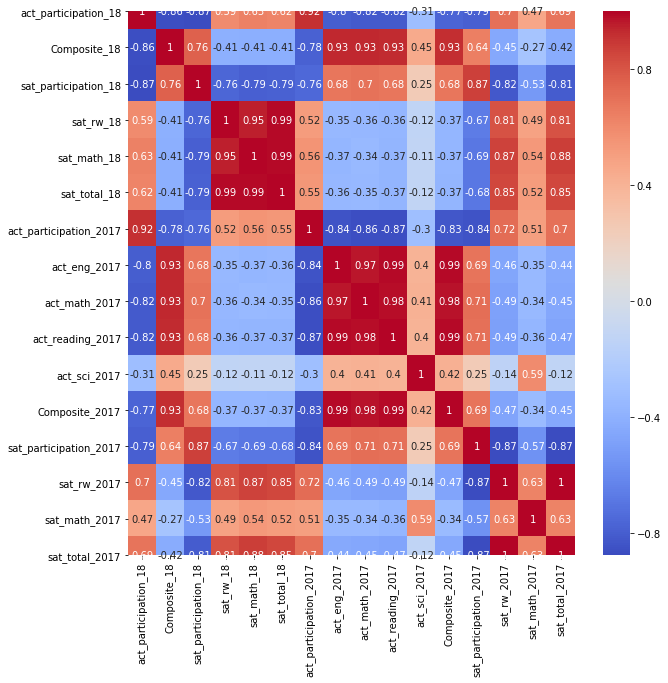

In [96]:
plt.figure(figsize = (10, 10))
sns.heatmap(final.corr(), cmap = 'coolwarm', annot = True)
# plt.title('Correlation Map of Final', fontsize = 25)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [97]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):

    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].set_title(list_of_titles[i])
        ax[i].hist(dataframe[column], bins = 30, alpha = 0.5, label = list_of_xlabels[i]) # feel free to add more settings
        ax[i].vlines(x = np.mean(dataframe[column]), ymin = 0, ymax = 10, color = 'r')
        plt.tight_layout()
        
        # Set titles, labels, etc here for each subplot

In [98]:
final.columns

Index(['State', 'act_participation_18', 'Composite_18', 'sat_participation_18',
       'sat_rw_18', 'sat_math_18', 'sat_total_18', 'act_participation_2017',
       'act_eng_2017', 'act_math_2017', 'act_reading_2017', 'act_sci_2017',
       'Composite_2017', 'sat_participation_2017', 'sat_rw_2017',
       'sat_math_2017', 'sat_total_2017'],
      dtype='object')

In [99]:
final.columns

Index(['State', 'act_participation_18', 'Composite_18', 'sat_participation_18',
       'sat_rw_18', 'sat_math_18', 'sat_total_18', 'act_participation_2017',
       'act_eng_2017', 'act_math_2017', 'act_reading_2017', 'act_sci_2017',
       'Composite_2017', 'sat_participation_2017', 'sat_rw_2017',
       'sat_math_2017', 'sat_total_2017'],
      dtype='object')

In [100]:
act17.head()

,State,act_participation_2017,act_eng_2017,act_math_2017,act_reading_2017,act_sci_2017,Composite_2017
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.0
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.0
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.0
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.0
5,California,31.0,22.5,22.7,23.1,22.2,22.0


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

## SAT & ACT Participation

<Figure size 1080x1080 with 0 Axes>

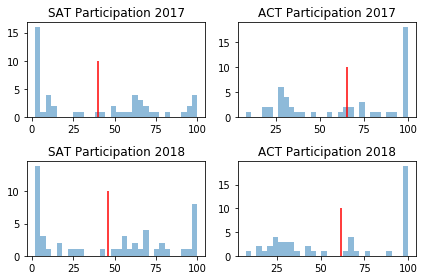

In [101]:
list_col = ['sat_participation_2017','act_participation_2017','sat_participation_18','act_participation_18']
list_title = ['SAT Participation 2017', 'ACT Participation 2017','SAT Participation 2018','ACT Participation 2018']
list_xlabels = ['SAT Participation 2017', 'ACT Participation 2017','SAT Participation 2018','ACT Participation 2018']

plt.figure(figsize = (15, 15))
subplot_histograms(final, list_col, list_title, list_xlabels)

##  Math scores for SAT & ACT

<Figure size 1080x1080 with 0 Axes>

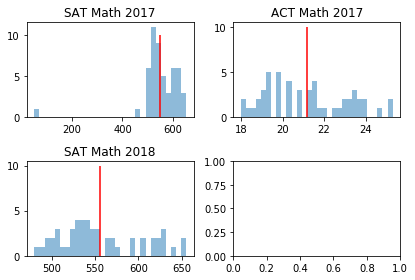

In [102]:
list_col = ['sat_math_2017','act_math_2017','sat_math_18']
list_title = ['SAT Math 2017', 'ACT Math 2017', 'SAT Math 2018']
list_xlabels = ['SAT Math 2017', 'ACT Math 2017','SAT Math 2018']

plt.figure(figsize = (15, 15))
subplot_histograms(final, list_col, list_title, list_xlabels)

## Reading/verbal scores for SAT & ACT

<Figure size 1080x1080 with 0 Axes>

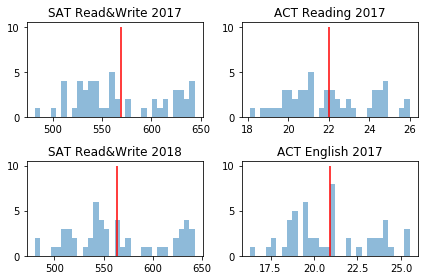

In [103]:
list_col = ['sat_rw_2017', 'act_reading_2017','sat_rw_18','act_eng_2017']
list_title = ['SAT Read&Write 2017', 'ACT Reading 2017','SAT Read&Write 2018','ACT English 2017']
list_xlabels = ['SAT Read&Write 2017', 'ACT Read 2017','SAT Read&Write 2018','ACT English 2017']

plt.figure(figsize = (15, 15))
subplot_histograms(final, list_col, list_title, list_xlabels)

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [104]:
def scatter(df, cols, title, xlabel, ylabel):
    plt.title(title)
    plt.scatter(df[cols[0]],df[cols[1]])
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel,fontsize=10)
    plt.show()

In [105]:
final.columns

Index(['State', 'act_participation_18', 'Composite_18', 'sat_participation_18',
       'sat_rw_18', 'sat_math_18', 'sat_total_18', 'act_participation_2017',
       'act_eng_2017', 'act_math_2017', 'act_reading_2017', 'act_sci_2017',
       'Composite_2017', 'sat_participation_2017', 'sat_rw_2017',
       'sat_math_2017', 'sat_total_2017'],
      dtype='object')

## SAT vs. ACT math scores for 2017

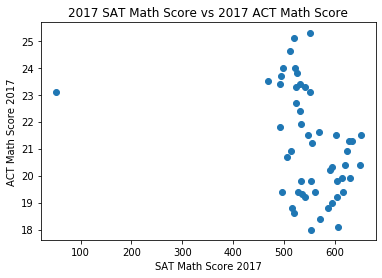

In [106]:
list_col = ['sat_math_2017', 'act_math_2017' ]
title = '2017 SAT Math Score vs 2017 ACT Math Score'
xlabel = 'SAT Math Score 2017'
ylabel = 'ACT Math Score 2017'

scatter(final, list_col, title, xlabel, ylabel)

In [107]:
final.head()

,State,act_participation_18,Composite_18,sat_participation_18,sat_rw_18,sat_math_18,sat_total_18,act_participation_2017,act_eng_2017,act_math_2017,act_reading_2017,act_sci_2017,Composite_2017,sat_participation_2017,sat_rw_2017,sat_math_2017,sat_total_2017
0,Alabama,100.0,19.1,6.0,595,571,1166,100.0,18.9,18.4,19.7,19.4,19.0,5.0,593,572,1165
1,Alaska,33.0,20.8,43.0,562,544,1106,65.0,18.7,19.8,20.4,19.9,19.0,38.0,547,533,1080
2,Arizona,66.0,19.2,29.0,577,572,1149,62.0,18.6,19.8,20.1,19.8,19.0,30.0,563,553,1116
3,Arkansas,100.0,19.4,5.0,592,576,1169,100.0,18.9,19.0,19.7,19.5,19.0,3.0,614,594,1208
4,California,27.0,22.7,60.0,540,536,1076,31.0,22.5,22.7,23.1,22.2,22.0,53.0,531,524,1055


## SAT vs. ACT verbal/reading scores for 2017

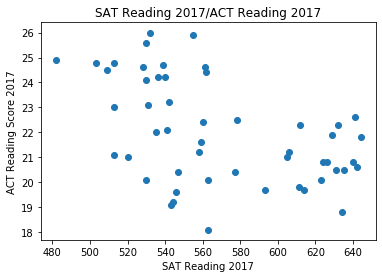

In [108]:
list_col = ['sat_rw_2017','act_reading_2017']
title = 'SAT Reading 2017/ACT Reading 2017'
xlabel = 'SAT Reading 2017'
ylabel = 'ACT Reading Score 2017'

scatter(final, list_col, title, xlabel, ylabel)

In [109]:
final.head()

,State,act_participation_18,Composite_18,sat_participation_18,sat_rw_18,sat_math_18,sat_total_18,act_participation_2017,act_eng_2017,act_math_2017,act_reading_2017,act_sci_2017,Composite_2017,sat_participation_2017,sat_rw_2017,sat_math_2017,sat_total_2017
0,Alabama,100.0,19.1,6.0,595,571,1166,100.0,18.9,18.4,19.7,19.4,19.0,5.0,593,572,1165
1,Alaska,33.0,20.8,43.0,562,544,1106,65.0,18.7,19.8,20.4,19.9,19.0,38.0,547,533,1080
2,Arizona,66.0,19.2,29.0,577,572,1149,62.0,18.6,19.8,20.1,19.8,19.0,30.0,563,553,1116
3,Arkansas,100.0,19.4,5.0,592,576,1169,100.0,18.9,19.0,19.7,19.5,19.0,3.0,614,594,1208
4,California,27.0,22.7,60.0,540,536,1076,31.0,22.5,22.7,23.1,22.2,22.0,53.0,531,524,1055


## SAT vs. ACT total/composite scores for 2017

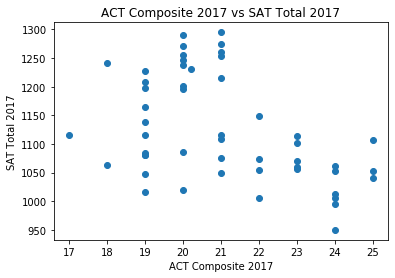

In [110]:
# Code
list_col = ['Composite_2017','sat_total_2017']
title = 'ACT Composite 2017 vs SAT Total 2017'
xlabel = 'ACT Composite 2017'
ylabel = 'SAT Total 2017'

scatter(final, list_col, title, xlabel, ylabel)

In [111]:
final.head()

,State,act_participation_18,Composite_18,sat_participation_18,sat_rw_18,sat_math_18,sat_total_18,act_participation_2017,act_eng_2017,act_math_2017,act_reading_2017,act_sci_2017,Composite_2017,sat_participation_2017,sat_rw_2017,sat_math_2017,sat_total_2017
0,Alabama,100.0,19.1,6.0,595,571,1166,100.0,18.9,18.4,19.7,19.4,19.0,5.0,593,572,1165
1,Alaska,33.0,20.8,43.0,562,544,1106,65.0,18.7,19.8,20.4,19.9,19.0,38.0,547,533,1080
2,Arizona,66.0,19.2,29.0,577,572,1149,62.0,18.6,19.8,20.1,19.8,19.0,30.0,563,553,1116
3,Arkansas,100.0,19.4,5.0,592,576,1169,100.0,18.9,19.0,19.7,19.5,19.0,3.0,614,594,1208
4,California,27.0,22.7,60.0,540,536,1076,31.0,22.5,22.7,23.1,22.2,22.0,53.0,531,524,1055


## Total scores for SAT 2017 vs. 2018

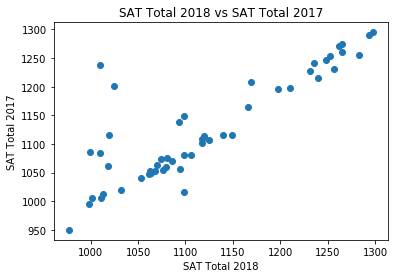

In [112]:
list_col = ['sat_total_18','sat_total_2017']
title = 'SAT Total 2018 vs SAT Total 2017'
xlabel = 'SAT Total 2018'
ylabel = 'SAT Total 2017'

scatter(final, list_col, title, xlabel, ylabel)

In [113]:
final.head()

,State,act_participation_18,Composite_18,sat_participation_18,sat_rw_18,sat_math_18,sat_total_18,act_participation_2017,act_eng_2017,act_math_2017,act_reading_2017,act_sci_2017,Composite_2017,sat_participation_2017,sat_rw_2017,sat_math_2017,sat_total_2017
0,Alabama,100.0,19.1,6.0,595,571,1166,100.0,18.9,18.4,19.7,19.4,19.0,5.0,593,572,1165
1,Alaska,33.0,20.8,43.0,562,544,1106,65.0,18.7,19.8,20.4,19.9,19.0,38.0,547,533,1080
2,Arizona,66.0,19.2,29.0,577,572,1149,62.0,18.6,19.8,20.1,19.8,19.0,30.0,563,553,1116
3,Arkansas,100.0,19.4,5.0,592,576,1169,100.0,18.9,19.0,19.7,19.5,19.0,3.0,614,594,1208
4,California,27.0,22.7,60.0,540,536,1076,31.0,22.5,22.7,23.1,22.2,22.0,53.0,531,524,1055


## Composite scores for ACT 2017 vs. 2018

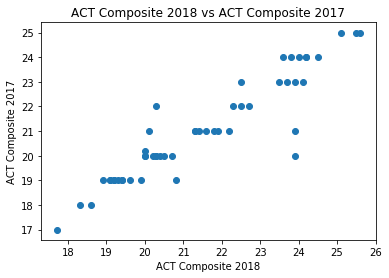

In [114]:
list_col = ['Composite_18','Composite_2017']
title = 'ACT Composite 2018 vs ACT Composite 2017'
xlabel = 'ACT Composite 2018'
ylabel = 'ACT Composite 2017'

scatter(final, list_col, title, xlabel, ylabel)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [115]:
import scipy.stats as stats

In [116]:
final.columns

Index(['State', 'act_participation_18', 'Composite_18', 'sat_participation_18',
       'sat_rw_18', 'sat_math_18', 'sat_total_18', 'act_participation_2017',
       'act_eng_2017', 'act_math_2017', 'act_reading_2017', 'act_sci_2017',
       'Composite_2017', 'sat_participation_2017', 'sat_rw_2017',
       'sat_math_2017', 'sat_total_2017'],
      dtype='object')

In [117]:
final.columns

Index(['State', 'act_participation_18', 'Composite_18', 'sat_participation_18',
       'sat_rw_18', 'sat_math_18', 'sat_total_18', 'act_participation_2017',
       'act_eng_2017', 'act_math_2017', 'act_reading_2017', 'act_sci_2017',
       'Composite_2017', 'sat_participation_2017', 'sat_rw_2017',
       'sat_math_2017', 'sat_total_2017'],
      dtype='object')

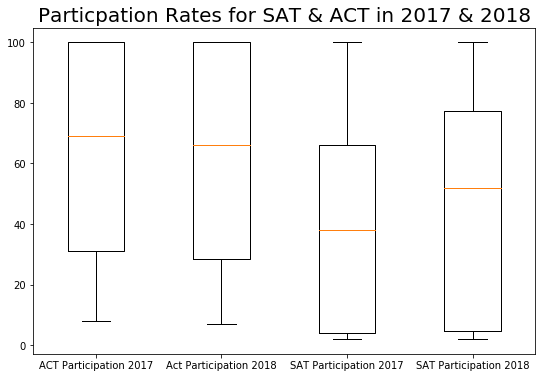

In [118]:
plot_1 = final['act_participation_2017']
plot_2 = final['act_participation_18']
plot_3 = final['sat_participation_2017']
plot_4 = final['sat_participation_18']

my_plots = [plot_1, plot_2, plot_3, plot_4]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(my_plots)

ax.set_xticklabels(['ACT Participation 2017', 'Act Participation 2018', 'SAT Participation 2017', 
                    'SAT Participation 2018'])
plt.title('Particpation Rates for SAT & ACT in 2017 & 2018', fontsize = 20);

In [119]:
final.columns

Index(['State', 'act_participation_18', 'Composite_18', 'sat_participation_18',
       'sat_rw_18', 'sat_math_18', 'sat_total_18', 'act_participation_2017',
       'act_eng_2017', 'act_math_2017', 'act_reading_2017', 'act_sci_2017',
       'Composite_2017', 'sat_participation_2017', 'sat_rw_2017',
       'sat_math_2017', 'sat_total_2017'],
      dtype='object')

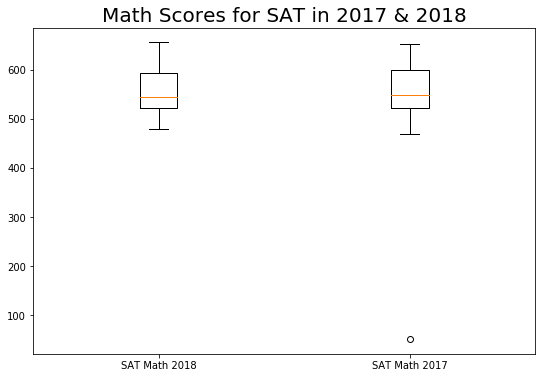

In [120]:
plot_1 = final['sat_math_18']
plot_2 = final['sat_math_2017']

my_plots = [plot_1, plot_2]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(my_plots)

ax.set_xticklabels(['SAT Math 2018', 'SAT Math 2017'])
plt.title('Math Scores for SAT in 2017 & 2018', fontsize = 20);

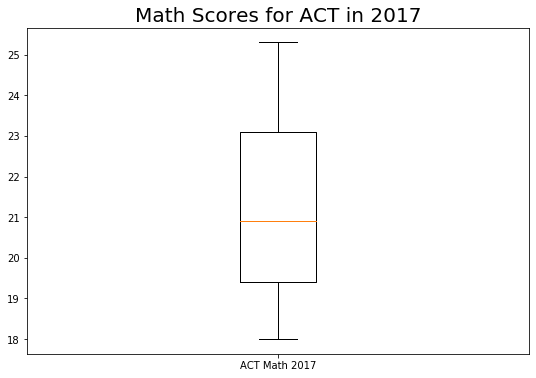

In [121]:
plot = final['act_math_2017']

my_plots = [plot]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(my_plots)

ax.set_xticklabels(['ACT Math 2017'])
plt.title('Math Scores for ACT in 2017', fontsize = 20);

In [122]:
final.columns

Index(['State', 'act_participation_18', 'Composite_18', 'sat_participation_18',
       'sat_rw_18', 'sat_math_18', 'sat_total_18', 'act_participation_2017',
       'act_eng_2017', 'act_math_2017', 'act_reading_2017', 'act_sci_2017',
       'Composite_2017', 'sat_participation_2017', 'sat_rw_2017',
       'sat_math_2017', 'sat_total_2017'],
      dtype='object')

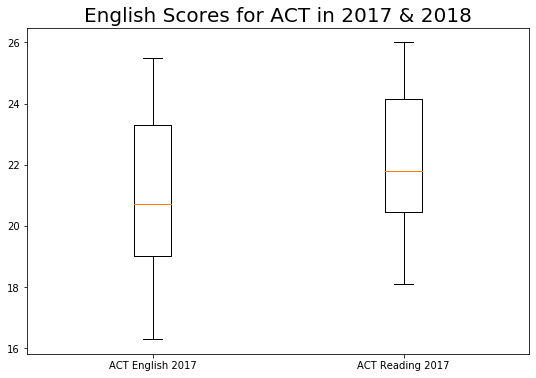

In [123]:
plot_1 = final['act_eng_2017']
plot_2 = final['act_reading_2017']
my_plots = [plot_1, plot_2]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(my_plots)

ax.set_xticklabels(['ACT English 2017', 'ACT Reading 2017'])
plt.title('English Scores for ACT in 2017 & 2018', fontsize = 20);

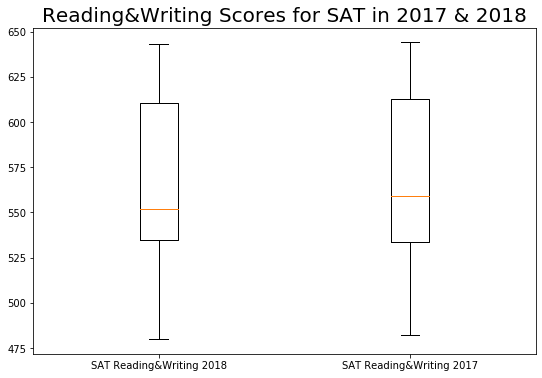

In [124]:
plot_1 = final['sat_rw_18']
plot_2 = final['sat_rw_2017']

my_plots = [plot_1, plot_2]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(my_plots)

ax.set_xticklabels(['SAT Reading&Writing 2018', 
                    'SAT Reading&Writing 2017'])
plt.title('Reading&Writing Scores for SAT in 2017 & 2018', fontsize = 20);

In [125]:
final.columns

Index(['State', 'act_participation_18', 'Composite_18', 'sat_participation_18',
       'sat_rw_18', 'sat_math_18', 'sat_total_18', 'act_participation_2017',
       'act_eng_2017', 'act_math_2017', 'act_reading_2017', 'act_sci_2017',
       'Composite_2017', 'sat_participation_2017', 'sat_rw_2017',
       'sat_math_2017', 'sat_total_2017'],
      dtype='object')

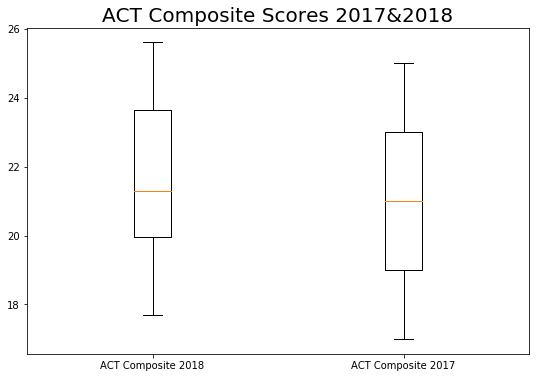

In [126]:
plot_1 = final['Composite_18']
plot_2 = final['Composite_2017']


my_plots = [plot_1, plot_2]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(my_plots)

ax.set_xticklabels(['ACT Composite 2018', 'ACT Composite 2017'])
plt.title('ACT Composite Scores 2017&2018', fontsize = 20);

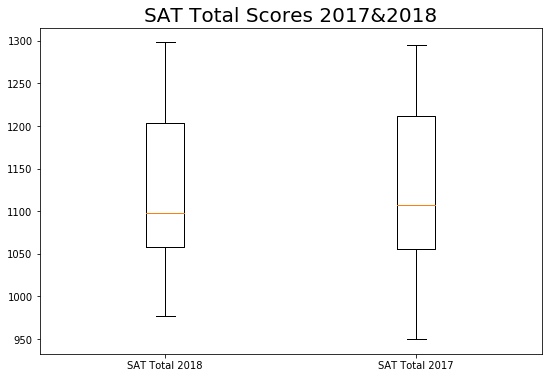

In [127]:
plot_1 = final['sat_total_18']
plot_2 = final['sat_total_2017']

my_plots = [plot_1, plot_2]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(my_plots)

ax.set_xticklabels(['SAT Total 2018', 'SAT Total 2017'])
plt.title('SAT Total Scores 2017&2018', fontsize = 20);

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [128]:
final.columns

Index(['State', 'act_participation_18', 'Composite_18', 'sat_participation_18',
       'sat_rw_18', 'sat_math_18', 'sat_total_18', 'act_participation_2017',
       'act_eng_2017', 'act_math_2017', 'act_reading_2017', 'act_sci_2017',
       'Composite_2017', 'sat_participation_2017', 'sat_rw_2017',
       'sat_math_2017', 'sat_total_2017'],
      dtype='object')

In [129]:
box_cols = [
    'act_participation_18', 
    'Composite_18', 
    'sat_participation_18',
    'sat_rw_18', 
    'sat_math_18', 
    'sat_total_18', 
    'act_participation_2017',
    'act_eng_2017', 
    'act_math_2017', 
    'act_reading_2017', 
    'act_sci_2017',
    'Composite_2017', 
    'sat_participation_2017', 
    'sat_rw_2017',
    'sat_math_2017', 
    'sat_total_2017']

In [130]:
for x in box_cols:
    skew = stats.skew(final[x])
    central_tendency = final[x].mean()
    std = np.std(final[x])
    print(f'For {x}, 1. skewness:{round(skew,3)} 2. central tendency: {round(central_tendency,3)} 3. standard deviation: {round(std,3)}')

For act_participation_18, 1. skewness:-0.026 2. central tendency: 61.725 3. standard deviation: 33.702
For Composite_18, 1. skewness:0.264 2. central tendency: 21.496 3. standard deviation: 2.091
For sat_participation_18, 1. skewness:0.132 2. central tendency: 45.745 3. standard deviation: 36.947
For sat_rw_18, 1. skewness:0.274 2. central tendency: 563.686 3. standard deviation: 47.035
For sat_math_18, 1. skewness:0.515 2. central tendency: 556.235 3. standard deviation: 47.302
For sat_total_18, 1. skewness:0.453 2. central tendency: 1120.02 3. standard deviation: 93.227
For act_participation_2017, 1. skewness:-0.192 2. central tendency: 65.255 3. standard deviation: 31.824
For act_eng_2017, 1. skewness:0.342 2. central tendency: 20.931 3. standard deviation: 2.33
For act_math_2017, 1. skewness:0.323 2. central tendency: 21.182 3. standard deviation: 1.962
For act_reading_2017, 1. skewness:0.261 2. central tendency: 22.014 3. standard deviation: 2.047
For act_sci_2017, 1. skewness:-3.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: No we don't see normally distributed data in particular I believe this is due to different state laws. Some requiring SAT or ACT test and some not requiring it at all which results in different sample sizes.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

In [131]:
final.columns

Index(['State', 'act_participation_18', 'Composite_18', 'sat_participation_18',
       'sat_rw_18', 'sat_math_18', 'sat_total_18', 'act_participation_2017',
       'act_eng_2017', 'act_math_2017', 'act_reading_2017', 'act_sci_2017',
       'Composite_2017', 'sat_participation_2017', 'sat_rw_2017',
       'sat_math_2017', 'sat_total_2017'],
      dtype='object')

[]

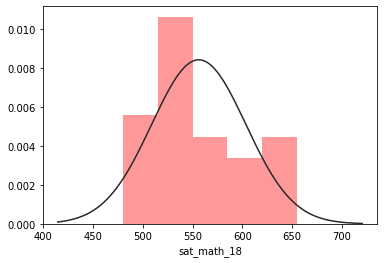

In [132]:
# x = (final['sat_math_18'], name="SAT Math 2018
import scipy
ax = sns.distplot(final['sat_math_18'],fit=scipy.stats.norm, kde=False, hist=True, color='r', label='SAT Math 2018')
ax.plot()
# sns.distplot(final['sat_math_18'])

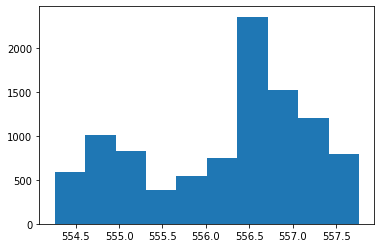

In [157]:
# Thanks StackOverflow
sample_means = []

for i in range(10_000):
    s = np.random.choice(final['sat_math_18'], size= 50, replace=False)
    x_bar = s.mean()
    sample_means.append(x_bar)

plt.hist(sample_means);

[]

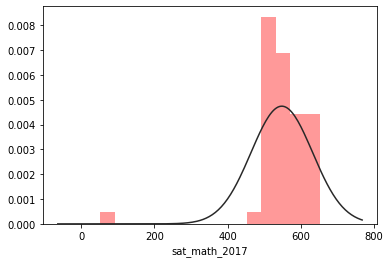

In [134]:
ax = sns.distplot(final['sat_math_2017'],fit=scipy.stats.norm, kde=False, hist=True, color='r', label='SAT Math 2018')
ax.plot()

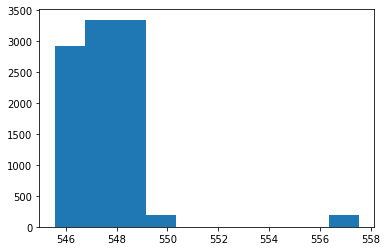

In [158]:
sample_means = []

for i in range(10_000):
    s = np.random.choice(final['sat_math_2017'], size= 50, replace=False)
    x_bar = s.mean()
    sample_means.append(x_bar)

plt.hist(sample_means);

[]

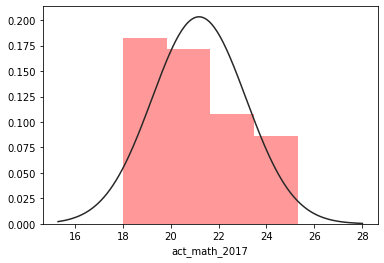

In [136]:
ax = sns.distplot(final['act_math_2017'],fit=scipy.stats.norm, kde=False, hist=True, color='r', label='ACT Math 2017')
ax.plot()

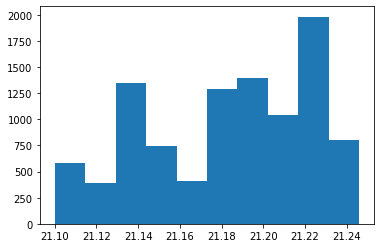

In [159]:
sample_means = []

for i in range(10_000):
    s = np.random.choice(final['act_math_2017'], size= 50, replace=False)
    x_bar = s.mean()
    sample_means.append(x_bar)

plt.hist(sample_means);

In [138]:
final.columns

Index(['State', 'act_participation_18', 'Composite_18', 'sat_participation_18',
       'sat_rw_18', 'sat_math_18', 'sat_total_18', 'act_participation_2017',
       'act_eng_2017', 'act_math_2017', 'act_reading_2017', 'act_sci_2017',
       'Composite_2017', 'sat_participation_2017', 'sat_rw_2017',
       'sat_math_2017', 'sat_total_2017'],
      dtype='object')

[]

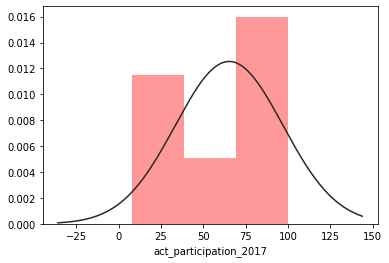

In [139]:
ax = sns.distplot(final['act_participation_2017'],fit=scipy.stats.norm, kde=False, hist=True, color='r', label='ACT Participation 2017')
ax.plot()

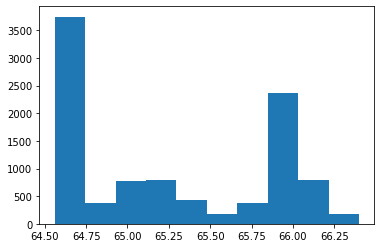

In [160]:
sample_means = []

for i in range(10_000):
    s = np.random.choice(final['act_participation_2017'], size= 50, replace=False)
    x_bar = s.mean()
    sample_means.append(x_bar)

plt.hist(sample_means);

[]

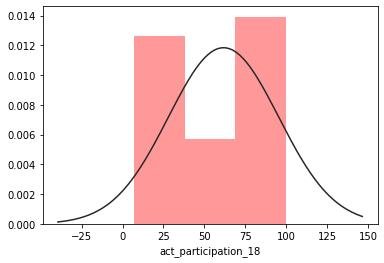

In [141]:
ax = sns.distplot(final['act_participation_18'],fit=scipy.stats.norm, kde=False, hist=True, color='r', label='ACT Math 2017')
ax.plot()

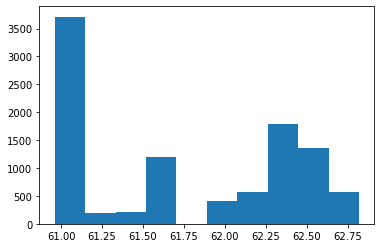

In [161]:
sample_means = []

for i in range(10_000):
    s = np.random.choice(final['act_participation_18'], size= 50, replace=False)
    x_bar = s.mean()
    sample_means.append(x_bar)

plt.hist(sample_means);

[]

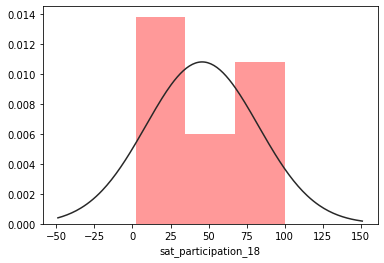

In [143]:
ax = sns.distplot(final['sat_participation_18'],fit=scipy.stats.norm, kde=False, hist=True, color='r', label='ACT Math 2017')
ax.plot()

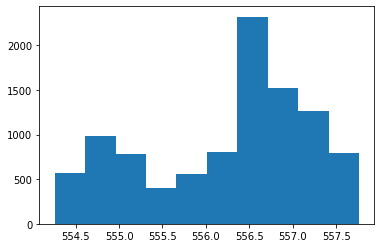

In [162]:
sample_means = []

for i in range(10_000):
    s = np.random.choice(final['sat_math_18'], size= 50, replace=False)
    x_bar = s.mean()
    sample_means.append(x_bar)

plt.hist(sample_means);

[]

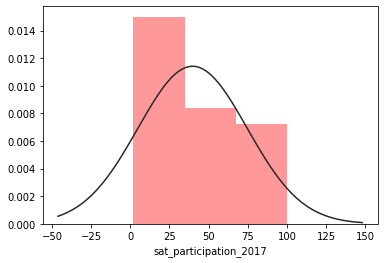

In [145]:
ax = sns.distplot(final['sat_participation_2017'],fit=scipy.stats.norm, kde=False, hist=True, color='r', label='SAT Participation 2017')
ax.plot()

(array([1361.,  188.,  421., 1803.,  586.,  612.,  207.,  391.,  416.,
        4015.]),
 array([38.6  , 38.796, 38.992, 39.188, 39.384, 39.58 , 39.776, 39.972,
        40.168, 40.364, 40.56 ]),
 <a list of 10 Patch objects>)

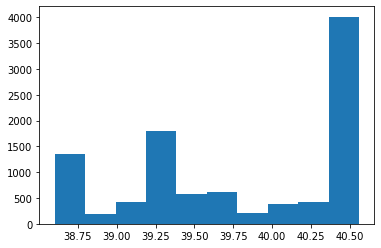

In [164]:
sampleMeans = []
for i in range(10_000):
    s = np.random.choice(final['sat_participation_2017'], size= 50, replace=False)
    sampleMean = s.mean()
    sampleMeans.append(sampleMean)
plt.hist(sampleMeans)

In [147]:
final.columns

Index(['State', 'act_participation_18', 'Composite_18', 'sat_participation_18',
       'sat_rw_18', 'sat_math_18', 'sat_total_18', 'act_participation_2017',
       'act_eng_2017', 'act_math_2017', 'act_reading_2017', 'act_sci_2017',
       'Composite_2017', 'sat_participation_2017', 'sat_rw_2017',
       'sat_math_2017', 'sat_total_2017'],
      dtype='object')

[]

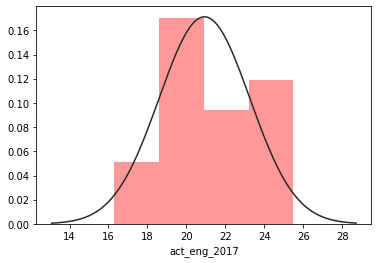

In [148]:
ax = sns.distplot(final['act_eng_2017'],fit=scipy.stats.norm, kde=False, hist=True, color='r', label='ACT English 2017')
ax.plot()

(array([ 573., 1388.,  794.,  592., 1380.,  940., 1541., 2021.,  554.,
         217.]),
 array([20.84  , 20.8584, 20.8768, 20.8952, 20.9136, 20.932 , 20.9504,
        20.9688, 20.9872, 21.0056, 21.024 ]),
 <a list of 10 Patch objects>)

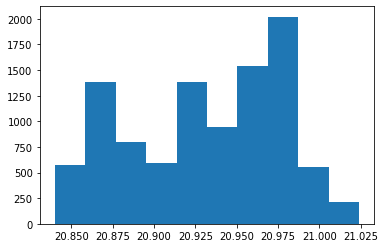

In [165]:
sampleMeans = []
for _ in range(10_000):
    s = np.random.choice(final['act_eng_2017'], size= 50, replace=False)
    sampleMean = s.mean()
    sampleMeans.append(sampleMean)
plt.hist(sampleMeans)

[]

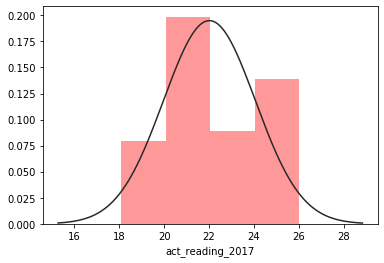

In [150]:
ax = sns.distplot(final['act_reading_2017'],fit=scipy.stats.norm, kde=False, hist=True, color='r', label='ACT Reading 2017')
ax.plot()

(array([ 594., 1369.,  813.,  597., 1208.,  793., 2148., 1560.,  580.,
         338.]),
 array([21.934 , 21.9498, 21.9656, 21.9814, 21.9972, 22.013 , 22.0288,
        22.0446, 22.0604, 22.0762, 22.092 ]),
 <a list of 10 Patch objects>)

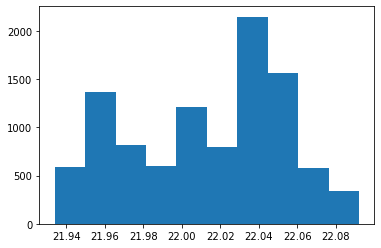

In [166]:
sampleMeans = []
for _ in range(10_000):
    s = np.random.choice(final['act_reading_2017'], size= 50, replace=False)
    sampleMean = s.mean()
    sampleMeans.append(sampleMean)
plt.hist(sampleMeans)

[]

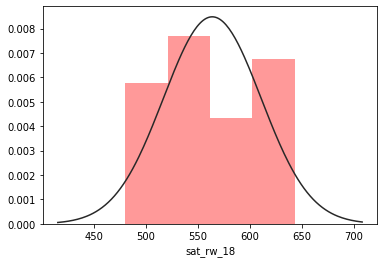

In [152]:
ax = sns.distplot(final['sat_rw_18'],fit=scipy.stats.norm, kde=False, hist=True, color='r', label='SAT Reading&Writing 2018')
ax.plot()

(array([1963.,  599.,  404.,  201., 1399., 1342., 1735., 1009.,  980.,
         368.]),
 array([562.1  , 562.426, 562.752, 563.078, 563.404, 563.73 , 564.056,
        564.382, 564.708, 565.034, 565.36 ]),
 <a list of 10 Patch objects>)

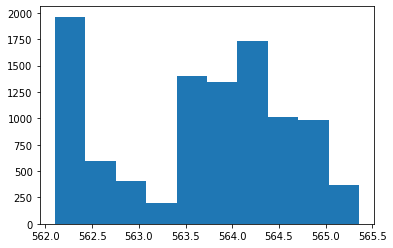

In [167]:
sampleMeans = []
for _ in range(10_000):
    s = np.random.choice(final['sat_rw_18'], size= 50, replace=False)
    sampleMean = s.mean()
    sampleMeans.append(sampleMean)
plt.hist(sampleMeans)

[]

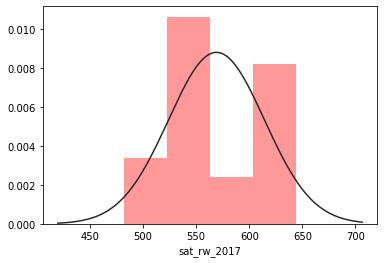

In [154]:
ax = sns.distplot(final['sat_rw_2017'],fit=scipy.stats.norm, kde=False, hist=True, color='r', label='SAT Reading&Writing 2017')
ax.plot()

(array([1667.,  993.,  580.,  192.,  394., 1775., 2199., 1016.,  980.,
         204.]),
 array([567.62 , 567.944, 568.268, 568.592, 568.916, 569.24 , 569.564,
        569.888, 570.212, 570.536, 570.86 ]),
 <a list of 10 Patch objects>)

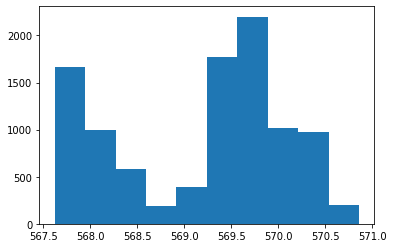

In [168]:
sampleMeans = []
for _ in range(10_000):
    s = np.random.choice(final['sat_rw_2017'], size= 50, replace=False)
    sampleMean = s.mean()
    sampleMeans.append(sampleMean)
plt.hist(sampleMeans)

Answer:

In [169]:
final.head()

,State,act_participation_18,Composite_18,sat_participation_18,sat_rw_18,sat_math_18,sat_total_18,act_participation_2017,act_eng_2017,act_math_2017,act_reading_2017,act_sci_2017,Composite_2017,sat_participation_2017,sat_rw_2017,sat_math_2017,sat_total_2017
0,Alabama,100.0,19.1,6.0,595,571,1166,100.0,18.9,18.4,19.7,19.4,19.0,5.0,593,572,1165
1,Alaska,33.0,20.8,43.0,562,544,1106,65.0,18.7,19.8,20.4,19.9,19.0,38.0,547,533,1080
2,Arizona,66.0,19.2,29.0,577,572,1149,62.0,18.6,19.8,20.1,19.8,19.0,30.0,563,553,1116
3,Arkansas,100.0,19.4,5.0,592,576,1169,100.0,18.9,19.0,19.7,19.5,19.0,3.0,614,594,1208
4,California,27.0,22.7,60.0,540,536,1076,31.0,22.5,22.7,23.1,22.2,22.0,53.0,531,524,1055


#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: It does NOT make sense to conduct statistical inference because some states have free ACT testing or require students take the ACT. Therefore, some states all high school students take the ACT where some states hardly any students take the ACT.
Source: https://magoosh.com/hs/act/2017/states-provide-act-free/

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: There are resources online that speak of concordance for both the ACT & SAT which essentially means that with certain tools they can convert your scores. I believe it is hard to compare the different math scores when certain states provide free testing so they have a higher sample taking the test.

Source: https://collegereadiness.collegeboard.org/pdf/guide-2018-act-sat-concordance.pdf

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [156]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [180]:
final.head()

,State,act_participation_18,Composite_18,sat_participation_18,sat_rw_18,sat_math_18,sat_total_18,act_participation_2017,act_eng_2017,act_math_2017,act_reading_2017,act_sci_2017,Composite_2017,sat_participation_2017,sat_rw_2017,sat_math_2017,sat_total_2017
0,Alabama,100.0,19.1,6.0,595,571,1166,100.0,18.9,18.4,19.7,19.4,19.0,5.0,593,572,1165
1,Alaska,33.0,20.8,43.0,562,544,1106,65.0,18.7,19.8,20.4,19.9,19.0,38.0,547,533,1080
2,Arizona,66.0,19.2,29.0,577,572,1149,62.0,18.6,19.8,20.1,19.8,19.0,30.0,563,553,1116
3,Arkansas,100.0,19.4,5.0,592,576,1169,100.0,18.9,19.0,19.7,19.5,19.0,3.0,614,594,1208
4,California,27.0,22.7,60.0,540,536,1076,31.0,22.5,22.7,23.1,22.2,22.0,53.0,531,524,1055


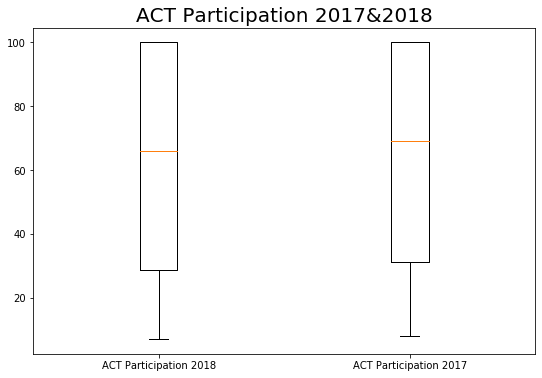

In [181]:
plot_1 = final['act_participation_18']
plot_2 = final['act_participation_2017']


my_plots = [plot_1, plot_2]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(my_plots)

ax.set_xticklabels(['ACT Participation 2018', 'ACT Participation 2017'])
plt.title('ACT Participation 2017&2018', fontsize = 20);

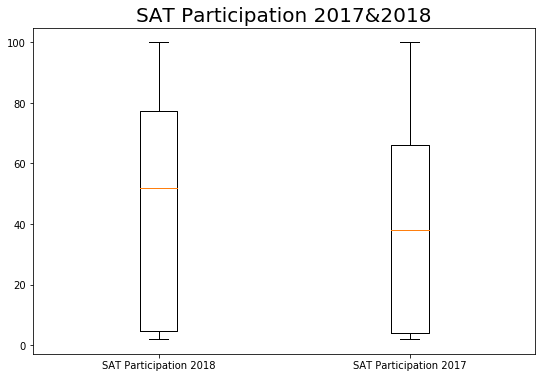

In [182]:
plot_1 = final['sat_participation_18']
plot_2 = final['sat_participation_2017']


my_plots = [plot_1, plot_2]

fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(my_plots)

ax.set_xticklabels(['SAT Participation 2018', 'SAT Participation 2017'])
plt.title('SAT Participation 2017&2018', fontsize = 20);

1. Alabama


Has free ACT testing which shows why their Participation rates were well above average
Alabama also required students to take the ACT 

Source: https://magoosh.com/hs/act/2017/states-that-require-the-act-or-sat/
Their Composite scores stayed about the same


2. Illinois


I noticed a dip in ACT tests from 2017 to 2018 from 93% participation to 43% participation in 2018
Through research the reason for this was due to the state no longer requiring the test to be taken and switching to 
the SAT 

Source: https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html

3. Colorado


In Colorado I noticed ACT participation went from 100% in 2017 to 30% in 2018 the reason for this was legislation decided to switch from the ACT being a requirement to SAT.

Source:https://co.chalkbeat.org/2015/12/23/21092477/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [172]:
final.head(15)

,State,act_participation_18,Composite_18,sat_participation_18,sat_rw_18,sat_math_18,sat_total_18,act_participation_2017,act_eng_2017,act_math_2017,act_reading_2017,act_sci_2017,Composite_2017,sat_participation_2017,sat_rw_2017,sat_math_2017,sat_total_2017
0,Alabama,100.0,19.1,6.0,595,571,1166,100.0,18.9,18.4,19.7,19.4,19.0,5.0,593,572,1165
1,Alaska,33.0,20.8,43.0,562,544,1106,65.0,18.7,19.8,20.4,19.9,19.0,38.0,547,533,1080
2,Arizona,66.0,19.2,29.0,577,572,1149,62.0,18.6,19.8,20.1,19.8,19.0,30.0,563,553,1116
3,Arkansas,100.0,19.4,5.0,592,576,1169,100.0,18.9,19.0,19.7,19.5,19.0,3.0,614,594,1208
4,California,27.0,22.7,60.0,540,536,1076,31.0,22.5,22.7,23.1,22.2,22.0,53.0,531,524,1055
5,Colorado,30.0,23.9,100.0,519,506,1025,100.0,20.1,20.3,21.2,20.9,20.0,11.0,606,595,1201
6,Connecticut,26.0,25.6,100.0,535,519,1053,31.0,25.5,24.6,25.6,24.6,25.0,100.0,530,512,1041
7,Delaware,17.0,23.8,100.0,505,492,998,18.0,24.1,23.4,24.8,23.6,24.0,100.0,503,492,996
8,District of Columbia,32.0,23.6,92.0,497,480,977,32.0,24.4,23.5,24.9,23.5,24.0,100.0,482,468,950
9,Florida,66.0,19.9,56.0,550,549,1099,73.0,19.0,19.4,21.0,19.4,19.0,83.0,520,497,1017


For the first time in 2017 Illinois provided free SAT test to 11th graders.
Average scores of schools ranged from 740 to 1300 in some schools. This shows the wide disparities that exist between the schools in the state of Illinois.

According to the Chicago Tribune, data supports the correlation between students taking the test in high-poverty neighborhoods and low scores and wealthy suburbs and higher scores.

My recommendation would be to possibly provide more resources for those taking the test. For example, study guides or even make sure those in high-poverty neighborhoods have food in their stomachs before taking the test.

Source: https://www.chicagotribune.com/news/breaking/ct-met-illinois-school-report-card-20171030-story.html